# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
import api_keys
# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
 # Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
# Try statement to append calls where value is found 
# Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
# Increase counter by one 
        record= record + 1
        
# Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=albany
Processing Record 2 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hermanus
Processing Record 3 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=mataura
Processing Record 4 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bluff
City not found. Skipping...
Processing Record 5 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=lavrentiya
Processing Record 6 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=rikitea
Processing Record 7 | Smithers
http://api.openweathermap.org/data/2

Processing Record 56 | Volosovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=volosovo
Processing Record 57 | San-Pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=san-pedro
Processing Record 58 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sao jose da coroa grande
Processing Record 59 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=college
Processing Record 60 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=port alfred
Processing Record 61 | Genhe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=genhe
City not found. Skipping...
Processing Record 62 | Pevek
http://api.openweathermap.org/data/2.5/weather?

Processing Record 112 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=buala
Processing Record 113 | Umm Bab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=umm bab
Processing Record 114 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=east london
Processing Record 115 | Pauini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=pauini
Processing Record 116 | Muncar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=muncar
Processing Record 117 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=saint-philippe
Processing Record 118 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c393

Processing Record 167 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=cidreira
Processing Record 168 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kavieng
Processing Record 169 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=vaini
City not found. Skipping...
Processing Record 170 | Yinchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=yinchuan
Processing Record 171 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=carnarvon
Processing Record 172 | Santa Pola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=santa pola
Processing Record 173 | Rorvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c

Processing Record 222 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=berlevag
Processing Record 223 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hami
Processing Record 224 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=riyadh
Processing Record 225 | Vinh Yen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=vinh yen
Processing Record 226 | Coxim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=coxim
Processing Record 227 | Acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=acajutla
City not found. Skipping...
Processing Record 228 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245

Processing Record 278 | Kennett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kennett
Processing Record 279 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=xining
Processing Record 280 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=maragogi
Processing Record 281 | Rio Sereno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=rio sereno
Processing Record 282 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kaitangata
Processing Record 283 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=huarmey
Processing Record 284 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec6

Processing Record 333 | Aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=aguimes
City not found. Skipping...
Processing Record 334 | Ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ginda
Processing Record 335 | Saint-Nazaire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=saint-nazaire
Processing Record 336 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kahului
Processing Record 337 | Hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hokitika
Processing Record 338 | Foki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=foki
Processing Record 339 | Semirom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627

Processing Record 389 | Morag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=morag
Processing Record 390 | Huainan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=huainan
Processing Record 391 | Kodino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kodino
Processing Record 392 | Tucurui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tucurui
Processing Record 393 | Ribeira Brava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ribeira brava
Processing Record 394 | Bay City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bay city
Processing Record 395 | Rio das Pedras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6e

City not found. Skipping...
Processing Record 445 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=waipawa
Processing Record 446 | Utete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=utete
Processing Record 447 | Port Keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=port keats
Processing Record 448 | Phek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=phek
Processing Record 449 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hofn
Processing Record 450 | Mamu Kanjan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=mamu kanjan
Processing Record 451 | Mujiayingzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c6

Processing Record 501 | Ler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ler
Processing Record 502 | Fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=fukue
Processing Record 503 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=waingapu
Processing Record 504 | Venice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=venice
Processing Record 505 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bambous virieux
Processing Record 506 | Tamiahua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tamiahua
Processing Record 507 | Kostomuksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e

Processing Record 557 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=klyuchi
City not found. Skipping...
Processing Record 558 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=northam
Processing Record 559 | Killarney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=killarney
Processing Record 560 | Beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=beloha
Processing Record 561 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=nouadhibou
Processing Record 562 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kalmunai
Processing Record 563 | Verkhnyaya Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
weather_data_dict = {
    "City Name": city_name, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
                   
# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_data_dict)

# Display count of weather data values 
weather_data.count()

City Name     582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Lng           582
Max Temp      582
Wind Speed    582
dtype: int64

In [6]:
#Save weather data to csv
weather_data.to_csv('../PythonAPI/weather_data.csv')

weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,40,US,1562718440,42,42.65,-73.75,80.60,4.70
1,Hermanus,0,ZA,1562718499,95,-34.42,19.24,57.99,5.01
2,Mataura,100,NZ,1562718499,97,-46.19,168.86,46.00,1.99
3,Bluff,85,AU,1562718582,67,-23.58,149.07,66.65,1.99
4,Lavrentiya,0,RU,1562718532,30,65.58,-170.99,73.13,7.45


#### Latitude vs. Temperature Plot

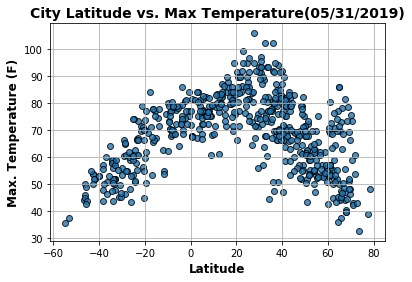

In [14]:
# Build a scatter plot for each data type
# plt.scatter(weather_data["Lat"], weather_data["Max Temp"], 
#             marker="o", 
#             s = max_temp*10, 
#             edgecolor="black", 
#             alpha=0.8, linewidths=1)


plt.scatter(weather_data["Lat"], weather_data["Max Temp"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Max. Temperature (F)", weight='semibold',fontsize=12)
plt.grid(True)

plt.savefig('../PythonAPI/Max_Temp vs. Latitude.png', dpi=150)


plt.show()

#### Latitude vs. Humidity Plot

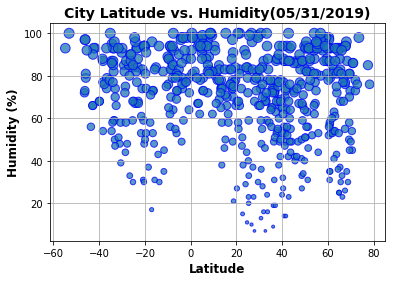

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s= humidity*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Humidity (%)", weight='semibold',fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Humidity.png', dpi=150)

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

C:\Users\anoos\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


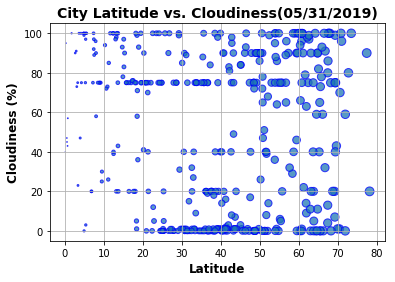

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s= lat*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold', fontsize=12)
plt.ylabel("Cloudiness (%)", weight='semibold', fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Cloudiness.png', dpi=150)

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

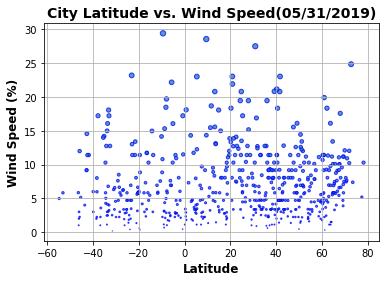

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s= wind_speed*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(05/31/2019)", weight='semibold', fontsize=14)
plt.xlabel("Latitude",weight='semibold', fontsize=12)
plt.ylabel("Wind Speed (%)",weight='semibold', fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Wind Speed.png', dpi=150)

#Show plot
plt.show()